******************** Train Data read ********************
     LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            2             1           1                     0             1   
1            4             1           0                     0             1   
2            1            13           4                     0             0   
3           19            15           1                     6            11   
4           14            11           4                     6            12   
..         ...           ...         ...                   ...           ...   
884         14             9           2                     1            25   
885         30            11           2                     9            17   
886          1             9           3                     4             0   
887          8           143          14                     3             0   
888          4             1           1                     1

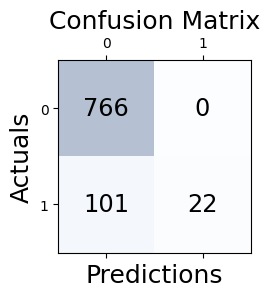

precision is: 1.0
Recall is: 0.17886178861788618
1.0
Specificity is: 1.0
PNV is: 0.8835063437139562
Area under curve(AUC): 0.97
F-Measure is: 0.3

              precision    recall  f1-score   support

           N       0.88      1.00      0.94       766
           Y       1.00      0.18      0.30       123

    accuracy                           0.89       889
   macro avg       0.94      0.59      0.62       889
weighted avg       0.90      0.89      0.85       889

Traininng Accuracy is 88.64
Misclassification Rate is:11.36
1.0
False Positive Ratio is:  0.0
False Negative Ratio is:  0.8211382113821138


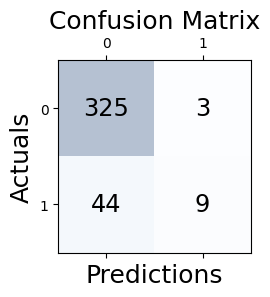

precision is: 0.75
Recall is: 0.16981132075471697
Specificity is: 0.9908536585365854
PNV is: 0.8807588075880759
Area under curve(AUC): 0.91
F-Measure is: 0.28

              precision    recall  f1-score   support

           N       0.88      0.99      0.93       328
           Y       0.75      0.17      0.28        53

    accuracy                           0.88       381
   macro avg       0.82      0.58      0.60       381
weighted avg       0.86      0.88      0.84       381

Testing accuracy is 87.66
Misclassification Rate is:12.34
False Positive Ratio is:  0.009146341463414642
False Negative Ratio is:  0.8301886792452831


In [12]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer


#-----------Fetching train and test data from root directory---------------#

dataset_url = "./PC4_Train.csv"
train_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Train Data read ' + "*" * 20)
print(train_data)


dataset_url = "./PC4_Test.csv"
test_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Test Data read ' + "*" * 20)
print(test_data);

#X_train, X_test has training & testing data
X_train=train_data.drop(columns='Defective')
print(X_train)
X_test = test_data.drop(columns='Defective')
print(X_test);

#Y_train, Y_test has train/test class lables 
Y_train = train_data["Defective"]
Y_test = test_data["Defective"]
print(Y_train)
print(Y_test)


#---------------applying voting ensemble---------------------#

voting_classifiers=[
    ['RF:',RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=500,max_features=None,random_state=0)],
    ['SVM:',svm.SVC(kernel='poly', C=2,probability=True,random_state=0)],
    ['NBG:',GaussianNB()]]
    
clf=VotingClassifier(estimators=voting_classifiers, voting='soft',verbose=1,)
print(clf.get_params())

#----------------training model--------------------------#

clf=clf.fit(X_train,Y_train)

#----------------get training predictios-----------------#

training_predictions= clf.predict(X_train)
#print(training_predictions);

#-----------------generate training confusion matrix--------#

confusion_matrix(Y_train,training_predictions,labels = ['N','Y'])

#----------------draw training confusion matrix--------------#

conf_matrix = confusion_matrix(Y_train,training_predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#-----------------get evaluation matrix of training data------------------#

#precision
precision = precision_score(Y_train,training_predictions,pos_label='Y')
print ("precision is: " + str(precision))


#recall
recall = recall_score(Y_train,training_predictions,pos_label='Y')
print ("Recall is: " + str(recall))


#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_train,training_predictions,pos_label='N')
print (specificity)
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_train,training_predictions,pos_label='N')
print ("PNV is: " + str(PNV))

# predict probabilities
pred_prob = clf.predict_proba(X_train)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_train, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_train, training_predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_train,training_predictions))

#--------------------get training accuracy-------------------#

tarining_accuracy=clf.score(X_train, Y_train)
#print(tarining_accuracy*100)
print("Traininng Accuracy is " +str(round(tarining_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-tarining_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
print (specificity)
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", + False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ", + False_negative_ratio)

#------------------get test predictions--------------------#

predictions = clf.predict(X_test)
#print(predictions);

#--------------generate test confusion matrix---------------#

confusion_matrix(Y_test,predictions,labels = ['N','Y'])

#--------------draw test  confusion matrix------------------#

conf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#-----------------get evaluation matrix of testing data------------------#

#precision
precision = precision_score(Y_test,predictions,pos_label='Y')
print ("precision is: " + str(precision))

#recall
recall = recall_score(Y_test,predictions,pos_label='Y')
print ("Recall is: " + str(recall))

#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_test,predictions,pos_label='N')
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_test,predictions,pos_label='N')
print ("PNV is: " + str(PNV))


# predict probabilities
pred_prob = clf.predict_proba(X_test)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_test, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_test, predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_test,predictions))

#--------------------get testing accuracy-------------------#

testing_accuracy=accuracy_score(Y_test, predictions)
#print(testing_accuracy*100)
print("Testing accuracy is " + str(round(testing_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-testing_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", + False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ", + False_negative_ratio)